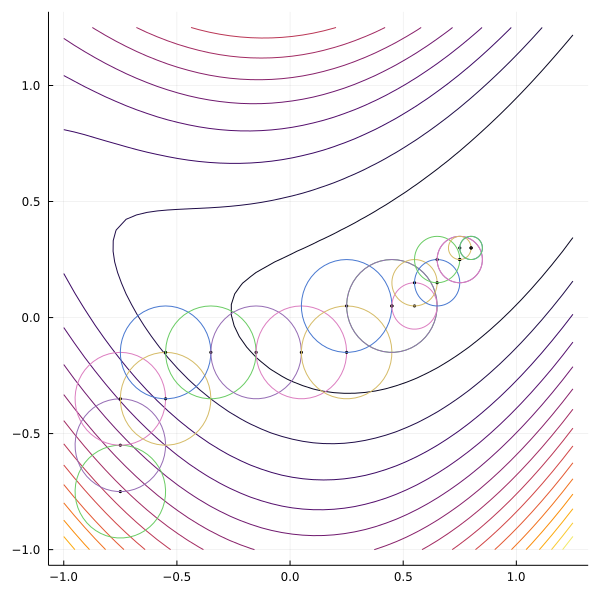

In [19]:
using LinearAlgebra
import Plots as plt

include("../lib/test_functions.jl")
import .TestFunctions: rosenbrock

function plot_contour!(plot, f, xdomain, ydomain)
    X = repeat(reshape(xdomain, 1, :), length(ydomain), 1)
    Y = repeat(ydomain, 1, length(xdomain))
    Z = map((x, y) -> f([x, y]), X, Y)
    plt.contour!(plot, xdomain, ydomain, Z; colorbar=false)
end

function plot_circle!(plot, center, radius)
  plt.scatter!(plot, [center[1]], [center[2]], color="pink", label="", markersize=2)
  angles = range(0, 2π, 50)
  xs = center[1] .+ radius .* sin.(angles)
  ys = center[2] .+ radius .* cos.(angles)
  return plt.plot!(plot, xs, ys, label="")
end

function hooke_jeeves(f, x0, α; ϵ=1e-4, γ=0.5, max_iter=50)
  n = length(x0)
  identity_matrix = Matrix{Float64}(I, n, n)
  pts = [(x0, α)]
  x, y = x0, f(x0)
  for _ in 1:max_iter
    improved = false
    x_best, y_best = x, y
    for i in 1:n
      for sign in (-1, 1)
        x_hat = x + sign * α * identity_matrix[i,:] 
        y_hat = f(x_hat)
        if y_hat < y_best
          x_best, y_best, improved = x_hat, y_hat, true
        end
      end
    end
    x, y = x_best, y_best
    push!(pts, (x, α))
    if !improved
      α *= γ
    end
    if α < ϵ
      break
    end
  end

  return pts
end

f, ∇f = rosenbrock(1, 2, 2)
xdomain = LinRange(-1, 1.25, 50)
ydomain = LinRange(-1, 1.25, 50)

plot = plt.plot(; size=(600, 600), palette=:seaborn_muted)
plot_contour!(plot, f, xdomain, ydomain)

radius = 0.2
x0 = [-0.75, -0.75]
for (pt, radius) in hooke_jeeves(f, x0, radius; ϵ=3e-2)
  plot_circle!(plot, pt, radius)
end
display(plot)